In [104]:
from rdflib import Graph, URIRef
from rdflib.namespace import PROV, RDFS, SDO
from rdflib.namespace import Namespace
from rdflib.tools.rdf2dot import rdf2dot

from IPython.display import display, Image
import pydotplus
import io

DQV = Namespace("http://www.w3.org/ns/dqv#")

g = Graph()

g.namespace_manager.bind("dqv", URIRef("http://www.w3.org/ns/dqv#"))

# define subjects
worker = URIRef("http://example.org/worker")
iq_assessment = URIRef("http://example.org/iq_assessment")
target_item = URIRef("http://example.org/target_item")

# add triples starting from worker
g.add((worker, RDFS.subClassOf, SDO.Person))

# add triples starting from assessment
g.add((iq_assessment, RDFS.subClassOf, DQV.QualityMeasurement))
g.add((iq_assessment, PROV.wasAttributedTo, worker))
g.add((iq_assessment, DQV.computedOn, target_item))

# add triples pointing to assessment
g.add((DQV.dimension, DQV.inDimension, iq_assessment))
g.add((DQV.metric, DQV.isMeasurementOf, iq_assessment))
g.add((target_item, DQV.hasQualityMeasurement, iq_assessment))

# add triples starting from target
g.add((target_item, RDFS.subClassOf, SDO.DigitalDocument))

g.serialize()


'@prefix dqv: <http://www.w3.org/ns/dqv#> .\n@prefix prov: <http://www.w3.org/ns/prov#> .\n@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .\n@prefix schema: <https://schema.org/> .\n\ndqv:dimension dqv:inDimension <http://example.org/iq_assessment> .\n\ndqv:metric dqv:isMeasurementOf <http://example.org/iq_assessment> .\n\n<http://example.org/target_item> rdfs:subClassOf schema:DigitalDocument ;\n    dqv:hasQualityMeasurement <http://example.org/iq_assessment> .\n\n<http://example.org/worker> rdfs:subClassOf schema:Person .\n\n<http://example.org/iq_assessment> rdfs:subClassOf dqv:QualityMeasurement ;\n    dqv:computedOn <http://example.org/target_item> ;\n    prov:wasAttributedTo <http://example.org/worker> .\n\n'

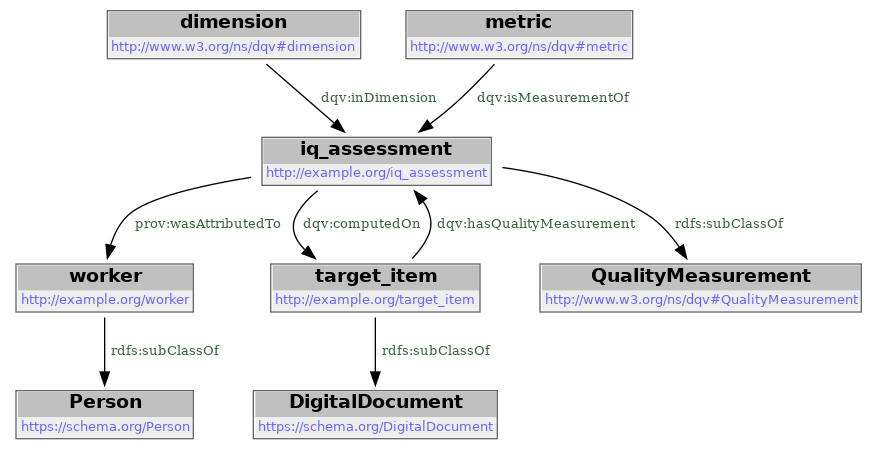

In [103]:
stream = io.StringIO()
rdf2dot(g, stream, opts={display})
dg = pydotplus.graph_from_dot_data(stream.getvalue())
png = dg.create_png()
display(Image(png))